In [1]:
%matplotlib inline
import pystan
import numpy as np
import matplotlib.pyplot as plt


PyStan: Python interface to Stan

https://github.com/stan-dev/pystan

In [2]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    real y[J]; // estimated treatment effects
    real<lower=0> sigma[J]; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    real eta[J];
}
transformed parameters {
    real theta[J];
    for (j in 1:J)
        theta[j] <- mu + tau * eta[j];
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

In [3]:
schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

In [4]:
fit = pystan.stan(model_code=schools_code, data=schools_dat,
                  iter=1000, chains=4)

print(fit)


Inference for Stan model: anon_model_7af71fe73cad6b7d51a4ce15383db4c6.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         8.19    0.31   5.44  -1.28   4.65   7.93  11.43  19.18  315.0    1.0
tau        6.73    0.31   5.59   0.29   2.52   5.42   9.51  21.29  329.0    1.0
eta[0]     0.35    0.04   0.93  -1.55  -0.27   0.37   0.99   2.14  563.0    1.0
eta[1]     0.02    0.04   0.88  -1.72  -0.54   0.02   0.58   1.84  560.0    1.0
eta[2]     -0.2    0.04   0.94  -2.05  -0.84  -0.24   0.42    1.7  534.0    1.0
eta[3]    -0.03    0.04    0.9   -1.9  -0.62  -0.01   0.55   1.71  543.0    1.0
eta[4]    -0.33    0.04   0.88  -2.11  -0.88  -0.34   0.24   1.41  537.0    1.0
eta[5]    -0.25    0.04   0.91  -2.05  -0.86  -0.27   0.36   1.54  552.0    1.0
eta[6]     0.32    0.04   0.89  -1.45  -0.25   0.31    0.9    2.1  506.0    1.0
eta[7]     0.

In [5]:
eta = fit.extract(permuted=True)['eta']
np.mean(eta, axis=0)

array([ 0.34745075,  0.02324738, -0.20351687, -0.03454671, -0.33163158,
       -0.24633651,  0.31718647,  0.07475159])

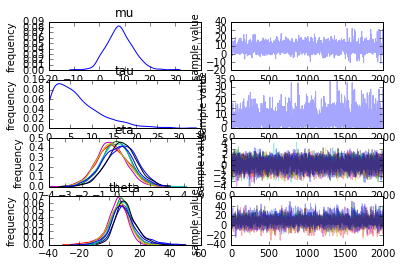

In [6]:
# if matplotlib is installed (optional, not required), a visual summary and
# traceplot are available
fit.plot()
plt.show()